# 선 그래프 (Line plot) 그리기
## 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x와 y의 원소개수는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.
- 선 스타일
    - linestyle 속성에 설정
    - https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv', index_col=0)
df

,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도(㎍/㎥/시)
년도,,,,,,
2006,4,5,1,2,11,2941
2007,3,4,1,1,12,1355
2008,1,1,1,1,11,933
2009,2,3,2,3,9,1157
2010,4,5,2,3,15,1354
2011,4,7,0,0,9,662
2012,0,0,0,0,1,338
2013,0,0,0,0,3,226
2014,0,0,0,0,10,259


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2006 to 2017
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   주의보 발령횟수     12 non-null     int64
 1   주의보 발령일수     12 non-null     int64
 2   경보 발령횟수      12 non-null     int64
 3   경보 발령일수      12 non-null     int64
 4   관측일수         12 non-null     int64
 5   최대농도(㎍/㎥/시)  12 non-null     int64
dtypes: int64(6)
memory usage: 672.0 bytes


In [4]:
df.rename(columns={df.columns[-1]:"최대농도"}, inplace=True)
df.head()

,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
년도,,,,,,
2006,4,5,1,2,11,2941
2007,3,4,1,1,12,1355
2008,1,1,1,1,11,933
2009,2,3,2,3,9,1157
2010,4,5,2,3,15,1354


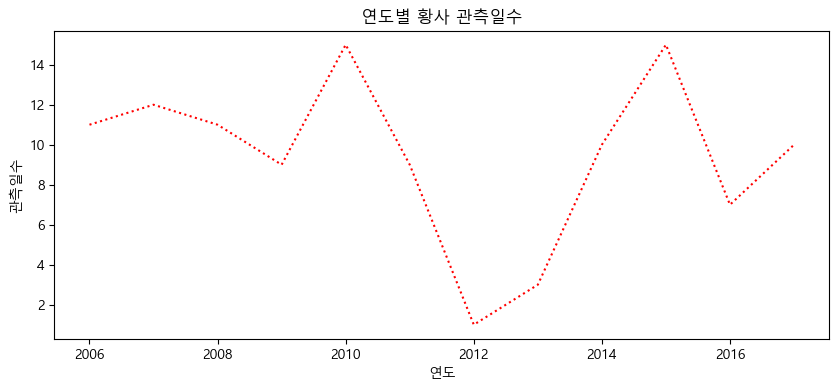

In [5]:
# 년도별 관측일수 변화
plt.figure(figsize=(10,4))
# line plot -> plot(x, y)
plt.plot(df.index, df['관측일수'], color='r', linestyle=':')

plt.title("연도별 황사 관측일수")
plt.xlabel("연도")
plt.ylabel("관측일수")

plt.show()

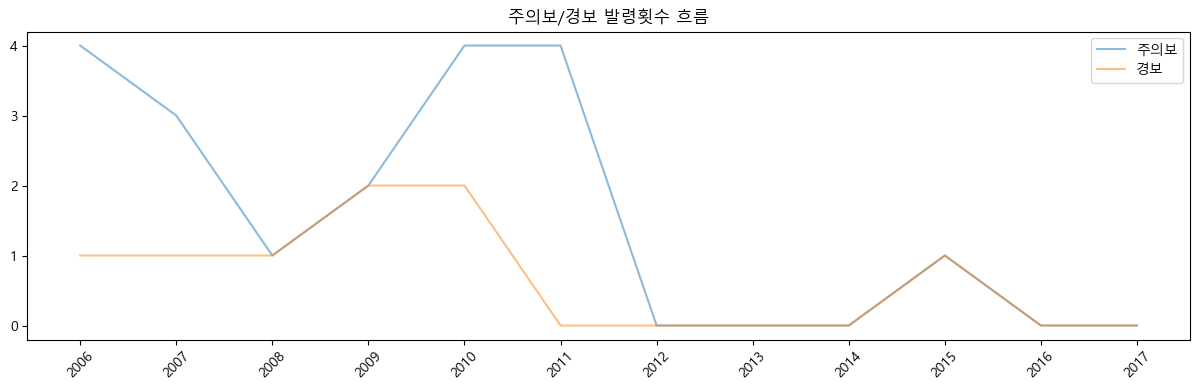

In [6]:
# 주의보 발령횟수와 경보 발령횟수의 흐름 비교
plt.figure(figsize=(15,4))

plt.plot(df.index, df['주의보 발령횟수'], alpha=0.5, label="주의보")  #  alpha : 투명도 (0~1)
plt.plot(df.index, df['경보 발령횟수'], alpha=0.5, label="경보")
plt.title("주의보/경보 발령횟수 흐름")

# 눈금(ticks) 변경 : xticks(), yticks() -> 눈금 위치, label 설정
plt.xticks(df.index, rotation=45)
plt.yticks(range(5))

plt.legend()
plt.show()

## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

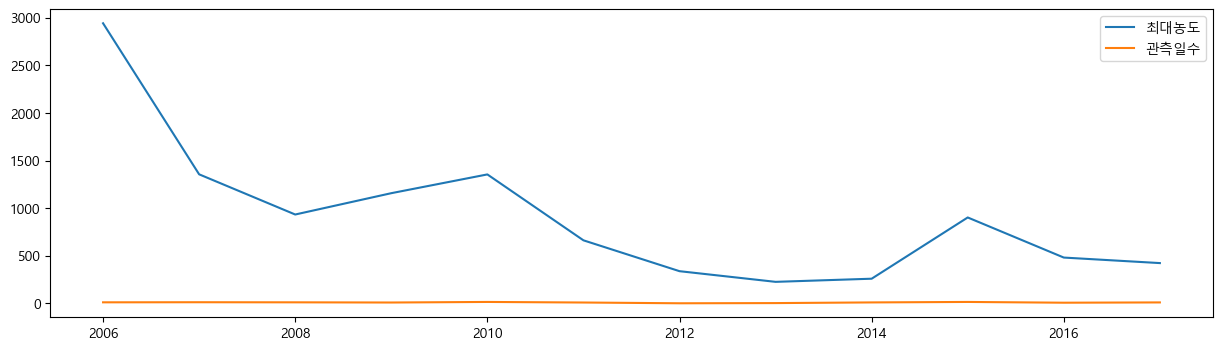

In [7]:
plt.figure(figsize=(15,4))
plt.plot(df.index, df["최대농도"], label="최대농도")
plt.plot(df.index, df["관측일수"], label="관측일수")

plt.legend()
plt.show()

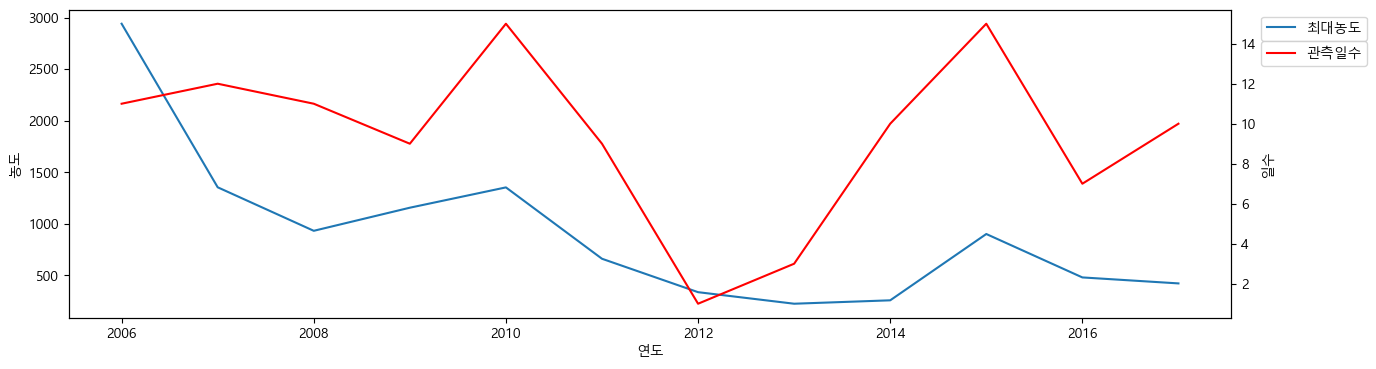

In [8]:
## x축은 공유, y축을 나눠서 최대농도와 관측일수 표현
plt.figure(figsize=(15,4))

# axes(subplot) 조회
ax1 = plt.gca()  # get current axes
ax2 = ax1.twinx()

ax1.plot(df.index, df['최대농도'], label="최대농도")
ax1.set_xlabel("연도")
ax1.set_ylabel("농도")
#loc=("상하위치(upper, center,lower) 좌우위치(left center right)")  # 정가운데 : center  # 최적 위치 : best
# ax1.legend(loc="upper center") 

# bbox_to_anchor와 loc를 같이 사용 -> 원하는 위치에 지정
# bbox_to_anchor는 legend 박스를 그리기 시작할 점의 위치
# loc은 legend box의 어느 부분을 bbox_to_anchor에 위치할 것인지 지정
ax1.legend(bbox_to_anchor=(1.02,1), loc="upper left")

ax2.plot(df.index, df['관측일수'], label="관측일수", color='r')
ax2.set_ylabel("일수")
ax2.legend(bbox_to_anchor=(1.02,0.92), loc="upper left")

plt.show()

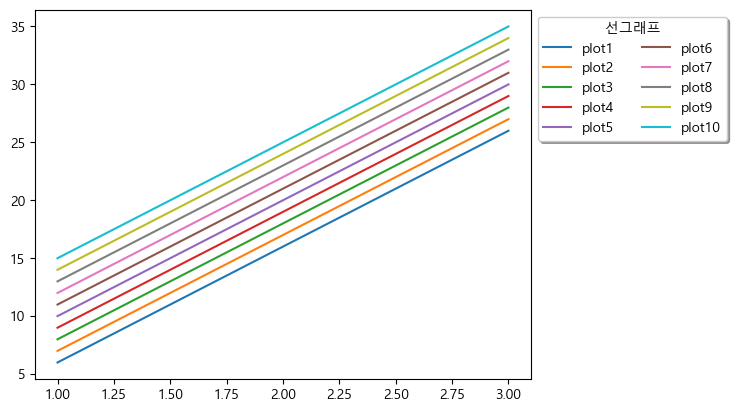

In [9]:
import numpy as np
x = np.array([1, 2, 3])
y = np.array([10, 20, 30])
plt.plot(x, y-4, label="plot1")
plt.plot(x, y-3, label="plot2")
plt.plot(x, y-2, label="plot3")
plt.plot(x, y-1, label="plot4")
plt.plot(x, y, label="plot5")
plt.plot(x, y+1, label="plot6")
plt.plot(x, y+2, label="plot7")
plt.plot(x, y+3, label="plot8")
plt.plot(x, y+4, label="plot9")
plt.plot(x, y+5, label="plot10")
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title="선그래프", ncol=2, shadow=True)
plt.show()

# 산점도 (Scatter Plot) 그리기
## 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 [상관관계나](#상관계수) 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x축 값, 2번인수 y축 값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
        - x와 y의 원소의 수는 같아야 한다.
    - c/color: 색지정
        - c와 x, y와 같은 원소수를 가지는 Iterable 타입 객체로 설정할 경우 각 마커마다 다른 색상을 설정할 수 있다
    - s: 점 크기 지정
    - marker
        - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
        - https://matplotlib.org/stable/api/markers_api.html 

In [10]:
df = pd.read_csv("data/diamonds.csv")
df.shape

(53940, 10)

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


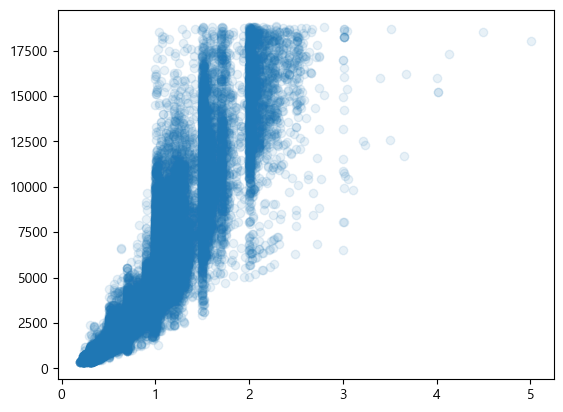

In [12]:
plt.scatter(df['carat'], df['price'], alpha=0.1)

> - ### 상관계수 
>     - 두 변수간의 상관관계(비례/반비례)를 정량적(수치적)으로 계산한 값.
>         - -1 ~ 1 사이의 값이 나온다. 
>         - 양의 상관관계: 0 ~ 1 (비례 관계) 
>         - 음의 상관관계: -1 ~ 0 (반비례 관계)
>         - 절대값 기준 1로 갈수록 두 변수의 상관관계가 강하고 0으로 갈수록 약하다.
>             - 1 ~ 0.7: 아주 강한 상관관계
>             - 0.7 ~ 0.3 : 강한 상관관계
>             - 0.3 ~ 0.1 : 약한 상관관계
>             - 0.1 ~ 0 : 관계없다.

In [63]:
df[['carat', 'price']].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


In [64]:
df.select_dtypes(include=["int64", "float64"]).corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


# 막대그래프 (Bar plot) 그리기
## 막대그래프(Bar plot)

- 수량/값의 크기를 비교하기 위해 막대 형식으로 나타낸 그래프
- 범주형 데이터의 class별 개수를 확인할 때 사용
- bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비  
- 매개변수
    - 첫번째: 수량을 셀 대상
    - 두번째: 수량

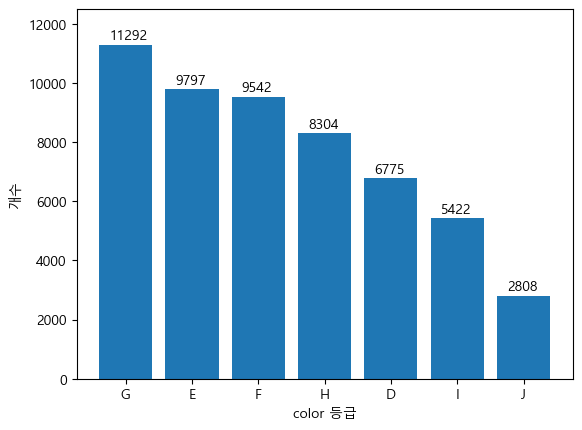

In [84]:
v = df['color'].value_counts()
plt.bar(v.index, v)

for x,y in enumerate(v):
    plt.text(x-0.25, y+180, str(y))
 
plt.ylim(0, 12500)  # y의 범위

plt.xlabel("color 등급")
plt.ylabel("개수")
plt.show()

In [18]:
# df = pd.read_excel('data/강수량.xlsx', index_col=0)
df = pd.read_excel('data/강수량.xlsx', index_col='계절')
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


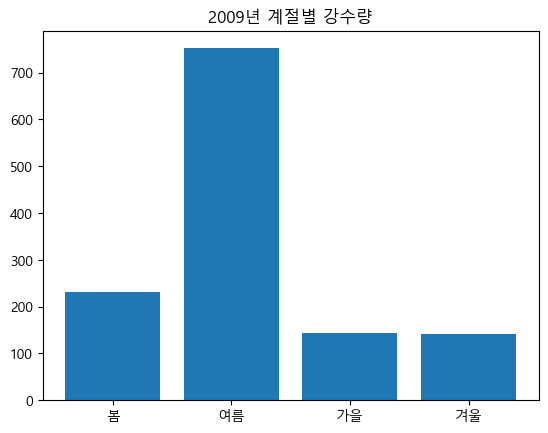

In [19]:
plt.bar(df.index, df[2009])
plt.title("2009년 계절별 강수량")
plt.show()

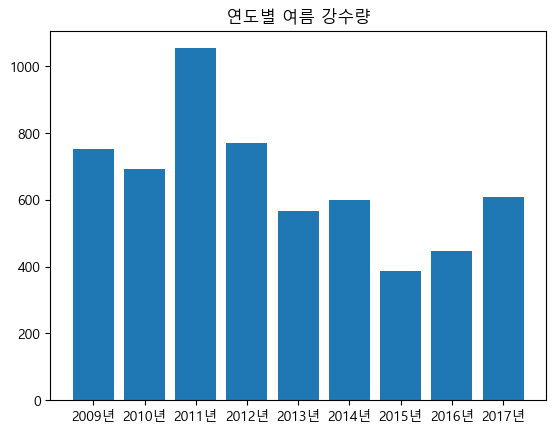

In [20]:
plt.bar(df.columns, df.loc['여름'])
plt.title("연도별 여름 강수량")
plt.xticks(range(2009,2018), labels=[f"{y}년" for y in range(2009,2018)])
plt.show()

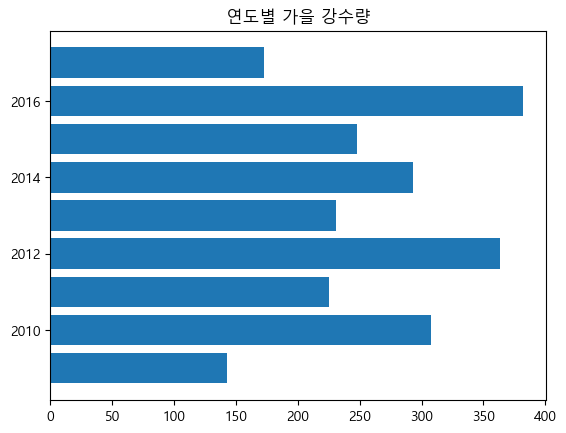

In [92]:
plt.barh(df.columns, df.loc['가을'])  # horizontal -> 수평 막대그래프
plt.title("연도별 가을 강수량")
plt.show()

# 파이차트(Pie chart)
- 전체 데이터량에서 각 범주(Category)가 차지하는 비율을 나타내는데 사용
- `pie(x, labels)` 이용
    - x: 값 (값들을 100을 기준으로 비율을 계산해 크기 설정)
    - labels : 값들의 label
    - autopct: 조각내에 표시될 비율의 문자열 형식. '%fmt문자' 
        - fmt문자: f(실수), d(정수), %% (%)
- 한국 웹브라우저 점유율을 파이차트로 작성
    - https://www.koreanextweb.kr/front/stats/browser/browserUseStats.do

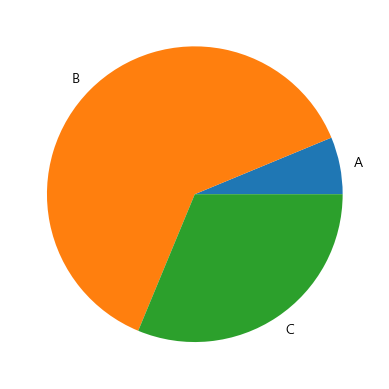

In [93]:
plt.pie([10,100,50], labels=['A', 'B', 'C'])
plt.show()

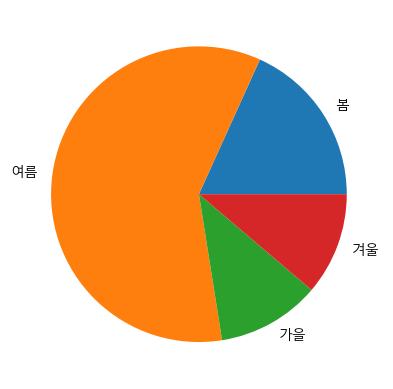

In [96]:
plt.pie(df[2009], labels=df.index)
plt.show()

In [169]:
# 웹브라우저 점유율
web = pd.read_excel('data/webbrowser_share.xls')
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              12 non-null     float64
 1   Chrome            12 non-null     float64
 2   Edge              12 non-null     float64
 3   Whale Browser     12 non-null     float64
 4   Safari            12 non-null     float64
 5   Firefox           12 non-null     float64
 6   IE                12 non-null     float64
 7   Opera             12 non-null     float64
 8   360 Safe Browser  12 non-null     float64
 9   Edge Legacy       12 non-null     float64
 10  Yandex Browser    12 non-null     float64
 11  Coc Coc           12 non-null     float64
 12  Mozilla           12 non-null     float64
 13  QQ Browser        12 non-null     float64
 14  Phoenix           12 non-null     float64
 15  Sogou Explorer    12 non-null     float64
dtypes: float64(16)
memory usage: 1.6 KB


In [53]:
web = pd.read_excel('data/webbrowser_share.xls',
                    converters={"date":str}, # 컬럼명: 타입 => 컬럼을 지정한
                    index_col="date")
web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2023.01 to 2023.12
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Chrome            12 non-null     float64
 1   Edge              12 non-null     float64
 2   Whale Browser     12 non-null     float64
 3   Safari            12 non-null     float64
 4   Firefox           12 non-null     float64
 5   IE                12 non-null     float64
 6   Opera             12 non-null     float64
 7   360 Safe Browser  12 non-null     float64
 8   Edge Legacy       12 non-null     float64
 9   Yandex Browser    12 non-null     float64
 10  Coc Coc           12 non-null     float64
 11  Mozilla           12 non-null     float64
 12  QQ Browser        12 non-null     float64
 13  Phoenix           12 non-null     float64
 14  Sogou Explorer    12 non-null     float64
dtypes: float64(15)
memory usage: 1.5+ KB


In [69]:
web.head()

,Chrome,Edge,Whale Browser,Safari,Firefox,IE,Opera,360 Safe Browser,Edge Legacy,Yandex Browser,Coc Coc,Mozilla,QQ Browser,Phoenix,Sogou Explorer
date,,,,,,,,,,,,,,,
2023.01,71.04,16.89,5.86,2.95,1.51,0.93,0.50,0.06,0.06,0.06,0.04,0.04,0.01,0.0,0.01
2023.02,71.25,16.93,5.85,2.94,1.51,0.72,0.51,0.05,0.05,0.04,0.07,0.03,0.01,0.0,0.00
2023.03,71.95,16.57,5.79,3.00,1.30,0.58,0.48,0.07,0.04,0.03,0.09,0.04,0.01,0.0,0.00
2023.04,72.73,15.95,5.51,3.00,1.46,0.57,0.47,0.07,0.03,0.04,0.09,0.03,0.01,0.0,0.00
2023.05,72.44,16.14,5.79,3.25,1.24,0.40,0.47,0.07,0.02,0.02,0.09,0.03,0.02,0.0,0.00


In [74]:
# chrome~firefox, 나머지는 기타로 묶기
web_df = web[web.columns[:5]].copy()

In [75]:
web[web.columns[5:]].sum(axis="columns")

date
2023.01    1.71
2023.02    1.48
2023.03    1.34
2023.04    1.31
2023.05    1.12
2023.06    1.40
2023.07    1.38
2023.08    1.47
2023.09    1.12
2023.10    1.02
2023.11    1.05
2023.12    1.00
dtype: float64

In [79]:
web_df['ETC'] = web[web.columns[5:]].sum(axis='columns')
web_df

,Chrome,Edge,Whale Browser,Safari,Firefox,ETC
date,,,,,,
2023.01,71.04,16.89,5.86,2.95,1.51,1.71
2023.02,71.25,16.93,5.85,2.94,1.51,1.48
2023.03,71.95,16.57,5.79,3.00,1.30,1.34
2023.04,72.73,15.95,5.51,3.00,1.46,1.31
2023.05,72.44,16.14,5.79,3.25,1.24,1.12
2023.06,69.70,17.31,6.25,3.75,1.57,1.40
2023.07,70.21,17.63,5.86,3.23,1.67,1.38
2023.08,71.30,16.80,5.79,3.06,1.55,1.47
2023.09,74.07,14.98,5.76,2.58,1.49,1.12


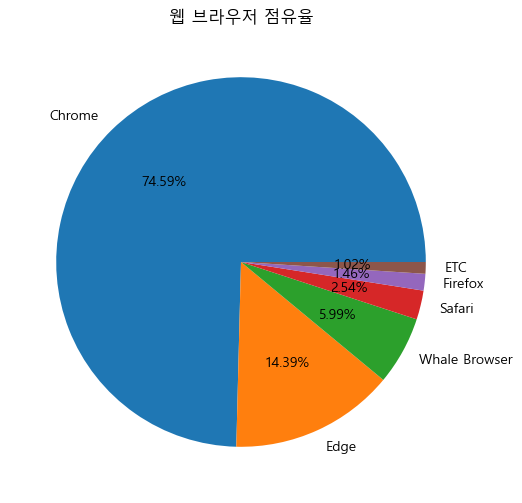

In [84]:
plt.figure(figsize=(6,6))

plt.pie(web_df.loc['2023.10'], labels=web_df.columns,
        autopct="%.2f%%")
plt.title("웹 브라우저 점유율")
plt.show()

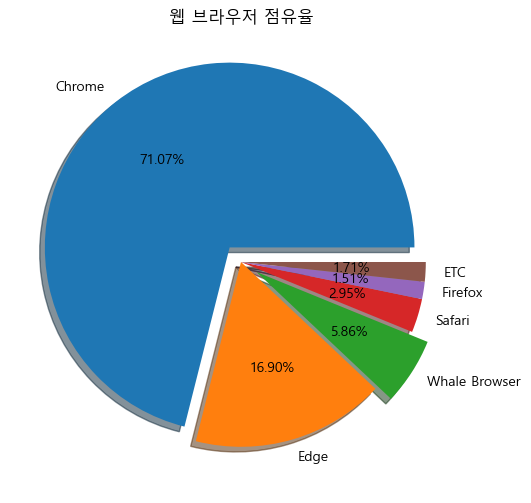

In [80]:
plt.figure(figsize=(6,6))

plt.pie(web_df.loc['2023.01'],
        labels=web_df.columns,
        autopct="%.2f%%",
        explode=[0.1,0,0.1,0,0,0],
        shadow=True
       )
plt.title("웹 브라우저 점유율")
plt.show()

# 히스토그램(Histogram) 그리기
## 히스토그램

- 도수 분포표를 그래프로 나타낸 것.
    - 도수분포표: 연속형 자료를 특정 구간(bin)으로 나눠 그 빈도를 나타낸 표
        - 빈도 확인이나 **분포**를 볼때 사용한다.
    - X축: 계급(변수구간)의 대표값, Y축: 빈도수
- `hist(data [, bins=계급개수)` 메소드를 사용
    - data: 리스트형의 객체를 전달한다.

In [85]:
tips = pd.read_csv("data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


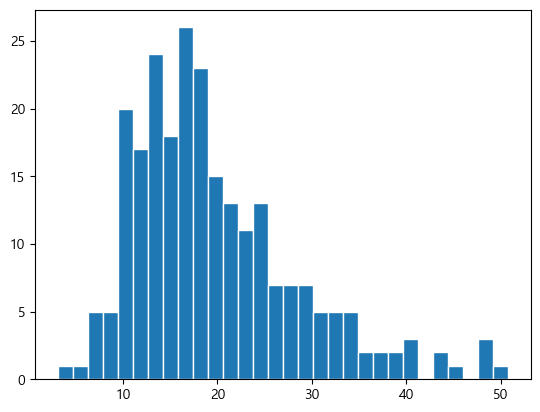

In [126]:
plt.hist(tips['total_bill'], bins=30, edgecolor='w')  # 범위를 30등분
plt.show()

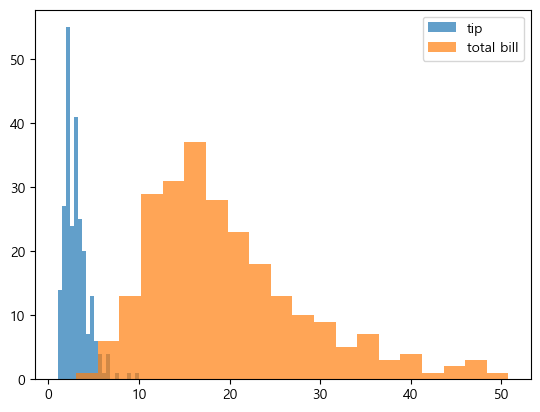

In [131]:
plt.hist(tips['tip'], bins=20, alpha=0.7, label="tip")
plt.hist(tips['total_bill'], bins=20, alpha=0.7, label="total bill")
plt.legend()
plt.show()

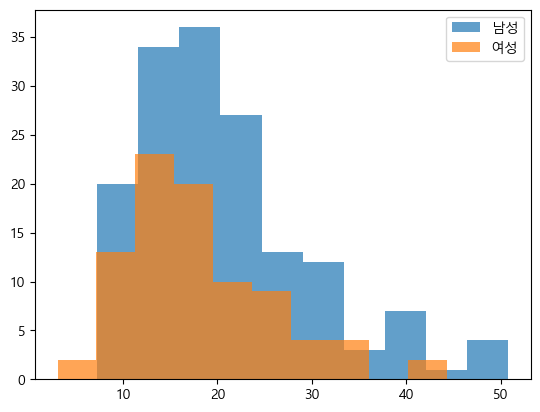

In [136]:
plt.hist(tips[tips['sex']=='Male']['total_bill'], alpha=0.7, label="남성")
plt.hist(tips[tips['sex']=='Female']['total_bill'], alpha=0.7, label="여성")
plt.legend()
plt.show()

# 상자그래프(Boxplot) 그리기
## 상자그래프란
- 연속형 값들의 사분위수, 극단값들을 이용해 값들의 분포를 시각화한다.
- boxplot(x, whis=1.5)
    - x: 데이터셋
    - whis: 극단치 계산시 사용할 값(기본 1.5)
        - IQR을 이용해 극단치 계산하기
            - IQR(Inter Quatile Range): $3분위수 - 1분위수$ 로 중간 50%값의 범위
            - 극단적으로 작은값: 1분위 - $IQR(3분위수-1분위수) * whis$   보다 작은 값들
            - 극단적으로 큰값: 3분위 + $IQR(3분위수-1분위수) * whis$  보다 큰 값들

In [382]:
tips.loc[tips['sex']=='Male', 'tip']

1      1.66
2      3.50
3      3.31
5      4.71
6      2.00
       ... 
236    1.00
237    1.17
239    5.92
241    2.00
242    1.75
Name: tip, Length: 157, dtype: float64

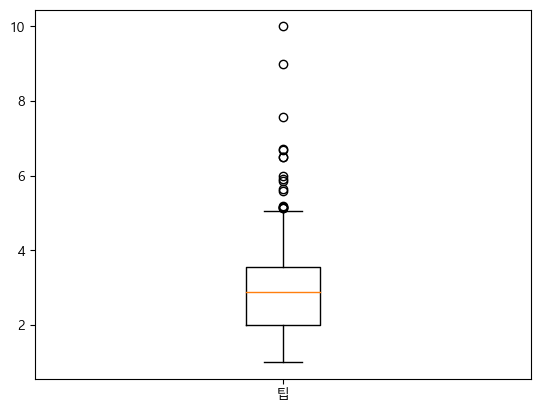

In [140]:
plt.boxplot(tips['tip'], labels='팁', whis=1)
plt.show()

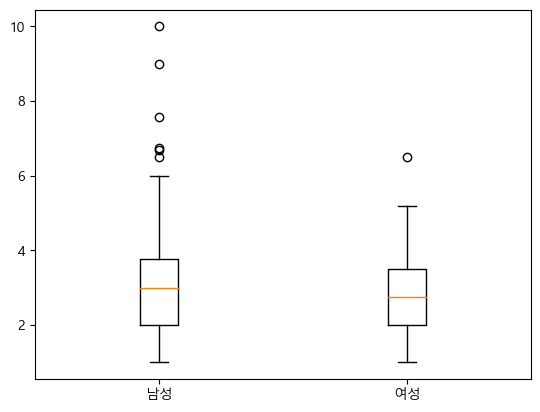

In [141]:
m_tip = tips.loc[tips['sex'] == 'Male', 'tip']
f_tip = tips.loc[tips['sex'] == 'Female', 'tip']
# 두 개 이상의 데이터들의 분포를 비교
plt.boxplot([m_tip, f_tip], labels=['남성', '여성'])

plt.show()